In [1]:
import tensorflow as tf
#from vanilla_autoencoder.vanilla_autoencoder import AUTOENCODER


from home.pn.PycharmProjects.autoencoders.helper_functions import *

/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarnin

In [5]:
import tensorflow as tf
from functools import partial

class AUTOENCODER(object):

    def __init__(self):
        n = 28 * 28  # for MNIST

        learning_rate = 0.01
        l2_reg = 0.0001

        self.X = tf.placeholder(tf.float32, shape=[None, n])

        self.he_init = tf.contrib.layers.variance_scaling_initializer()
        self.l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
        ## Partial allows to use the function my_dense_layer with same set parameters each time
        self.my_dense_layer = partial(tf.layers.dense, activation=tf.nn.elu, kernel_initializer=self.he_init, kernel_regularizer=self.l2_regularizer)

        self.hidden1 = self.my_dense_layer(self.X, 200)
        self.hidden2 = self.my_dense_layer(self.hidden1, 10)
        self.hidden3 = self.my_dense_layer(self.hidden2, 200)
        self.outputs = self.my_dense_layer(self.hidden3, n, activation=None)  ##Overwrite: no activation fn in last layer

        self.reconstruction_loss = tf.reduce_mean(tf.square(self.outputs - self.X))  # MSE

        self.reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        self.loss = tf.add_n([self.reconstruction_loss] + self.reg_losses)

        self.optimizer = tf.train.AdamOptimizer(learning_rate)
        self.training_op = self.optimizer.minimize(self.loss)

In [4]:
train_data, test_data, m = get_mnist_data()

Getting MNIST data..
Retrieved MNIST data


## 784-300-150-300-784

Epoch: 0 / 5
Epoch: 1 / 5
Epoch: 2 / 5
Epoch: 3 / 5
Epoch: 4 / 5


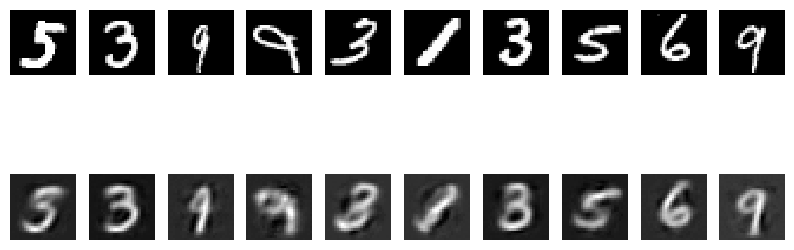

Epoch: 0 / 10
Epoch: 1 / 10
Epoch: 2 / 10
Epoch: 3 / 10
Epoch: 4 / 10
Epoch: 5 / 10
Epoch: 6 / 10
Epoch: 7 / 10
Epoch: 8 / 10
Epoch: 9 / 10


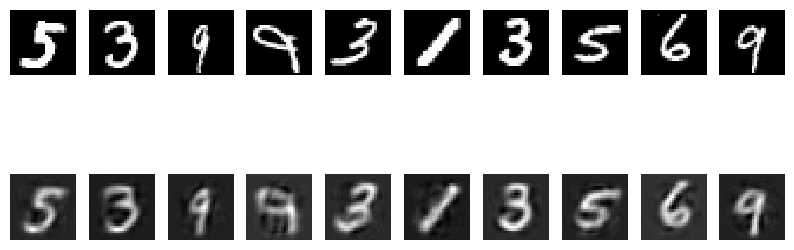

Epoch: 0 / 15
Epoch: 1 / 15
Epoch: 2 / 15
Epoch: 3 / 15
Epoch: 4 / 15
Epoch: 5 / 15
Epoch: 6 / 15
Epoch: 7 / 15
Epoch: 8 / 15
Epoch: 9 / 15
Epoch: 10 / 15
Epoch: 11 / 15
Epoch: 12 / 15
Epoch: 13 / 15
Epoch: 14 / 15


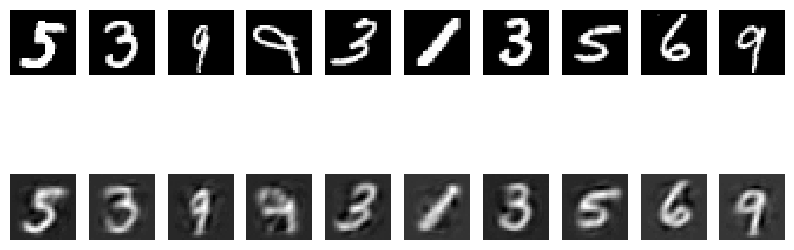

In [17]:
if __name__ == '__main__':

    experimental_tasks1 = []
    settings = [(5, 0.0001), (10, 0.0001), (15, 0.0001)]
    #train_data, test_data, m = get_mnist_data()

    for (num_epochs, l2_reg) in settings:

        model = AUTOENCODER()

        init = tf.global_variables_initializer()

        #Train
        train_loss, test_loss = [], []
        batch_size = 150
        with tf.Session()   as sess:
            init.run()
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
            for epoch in range(num_epochs):
                print("Epoch:", epoch, "/", num_epochs)
                n_batches = m//batch_size
                for batch in range(n_batches):
                    X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                    sess.run(model.training_op, feed_dict={model.X: X_batch})
                train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
                test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

            reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

        experimental_tasks1.append(((num_epochs, l2_reg), train_loss, test_loss))

        plot_reconstructions(test_data[0: 10], reconstructions)

## 784-300-150-50-150-300-784

Epoch: 0 / 15
Epoch: 1 / 15
Epoch: 2 / 15
Epoch: 3 / 15
Epoch: 4 / 15
Epoch: 5 / 15
Epoch: 6 / 15
Epoch: 7 / 15
Epoch: 8 / 15
Epoch: 9 / 15
Epoch: 10 / 15
Epoch: 11 / 15
Epoch: 12 / 15
Epoch: 13 / 15
Epoch: 14 / 15


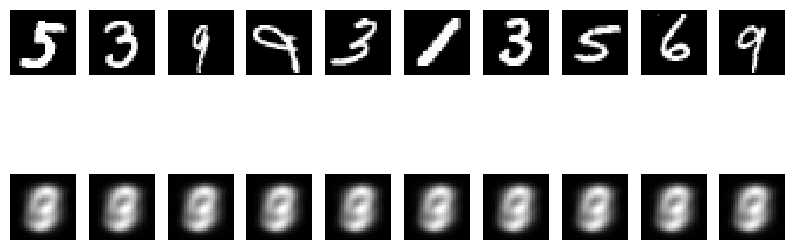

Epoch: 0 / 30
Epoch: 1 / 30
Epoch: 2 / 30
Epoch: 3 / 30
Epoch: 4 / 30
Epoch: 5 / 30
Epoch: 6 / 30
Epoch: 7 / 30
Epoch: 8 / 30
Epoch: 9 / 30
Epoch: 10 / 30
Epoch: 11 / 30
Epoch: 12 / 30
Epoch: 13 / 30
Epoch: 14 / 30
Epoch: 15 / 30
Epoch: 16 / 30
Epoch: 17 / 30
Epoch: 18 / 30
Epoch: 19 / 30
Epoch: 20 / 30
Epoch: 21 / 30
Epoch: 22 / 30
Epoch: 23 / 30
Epoch: 24 / 30
Epoch: 25 / 30
Epoch: 26 / 30
Epoch: 27 / 30
Epoch: 28 / 30
Epoch: 29 / 30


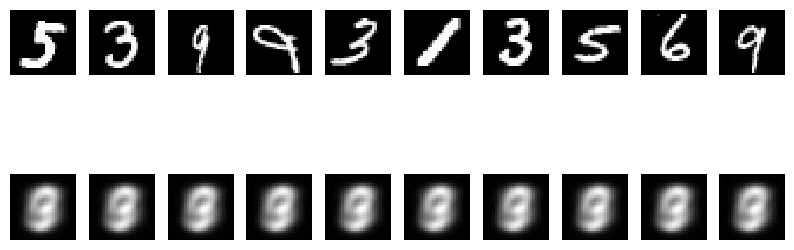

Epoch: 0 / 50
Epoch: 1 / 50
Epoch: 2 / 50
Epoch: 3 / 50
Epoch: 4 / 50
Epoch: 5 / 50
Epoch: 6 / 50
Epoch: 7 / 50
Epoch: 8 / 50
Epoch: 9 / 50
Epoch: 10 / 50
Epoch: 11 / 50
Epoch: 12 / 50
Epoch: 13 / 50
Epoch: 14 / 50
Epoch: 15 / 50
Epoch: 16 / 50
Epoch: 17 / 50
Epoch: 18 / 50
Epoch: 19 / 50
Epoch: 20 / 50
Epoch: 21 / 50
Epoch: 22 / 50
Epoch: 23 / 50
Epoch: 24 / 50
Epoch: 25 / 50
Epoch: 26 / 50
Epoch: 27 / 50
Epoch: 28 / 50
Epoch: 29 / 50
Epoch: 30 / 50
Epoch: 31 / 50
Epoch: 32 / 50
Epoch: 33 / 50
Epoch: 34 / 50
Epoch: 35 / 50
Epoch: 36 / 50
Epoch: 37 / 50
Epoch: 38 / 50
Epoch: 39 / 50
Epoch: 40 / 50
Epoch: 41 / 50
Epoch: 42 / 50
Epoch: 43 / 50
Epoch: 44 / 50
Epoch: 45 / 50
Epoch: 46 / 50
Epoch: 47 / 50
Epoch: 48 / 50
Epoch: 49 / 50


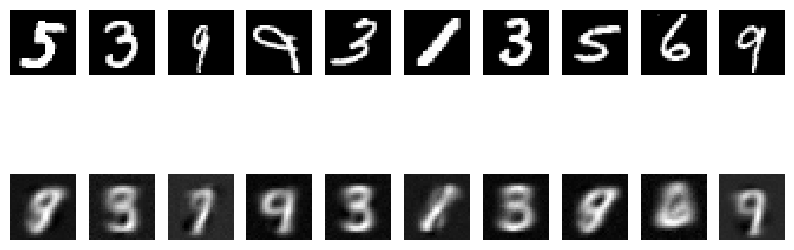

In [20]:
if __name__ == '__main__':

    experimental_tasks2 = []
    settings = [(15, 0.0001), (30, 0.0001), (50, 0.0001)]
    #train_data, test_data, m = get_mnist_data()

    for (num_epochs, l2_reg) in settings:

        model = AUTOENCODER()

        init = tf.global_variables_initializer()

        #Train
        train_loss, test_loss = [], []
        batch_size = 1500
        with tf.Session()   as sess:
            init.run()
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
            for epoch in range(num_epochs):
                print("Epoch:", epoch, "/", num_epochs)
                n_batches = m//batch_size
                for batch in range(n_batches):
                    X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                    sess.run(model.training_op, feed_dict={model.X: X_batch})
                train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
                test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

            reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

        experimental_tasks2.append(((num_epochs, l2_reg), train_loss, test_loss))

        plot_reconstructions(test_data[0: 10], reconstructions)

## 784-200-10-200-784

Epoch: 0 / 5
Epoch: 1 / 5
Epoch: 2 / 5
Epoch: 3 / 5
Epoch: 4 / 5


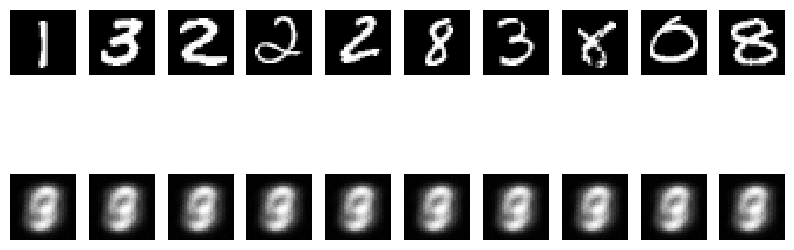

Epoch: 0 / 10
Epoch: 1 / 10
Epoch: 2 / 10
Epoch: 3 / 10
Epoch: 4 / 10
Epoch: 5 / 10
Epoch: 6 / 10
Epoch: 7 / 10
Epoch: 8 / 10
Epoch: 9 / 10


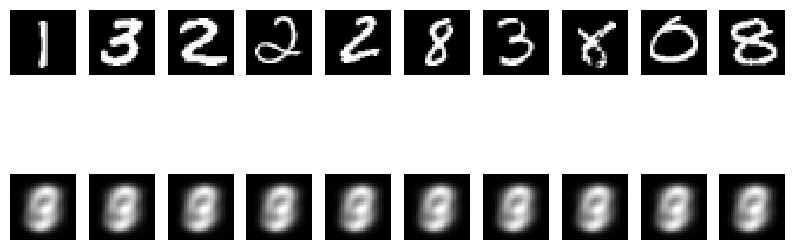

Epoch: 0 / 15
Epoch: 1 / 15
Epoch: 2 / 15
Epoch: 3 / 15
Epoch: 4 / 15
Epoch: 5 / 15
Epoch: 6 / 15
Epoch: 7 / 15
Epoch: 8 / 15
Epoch: 9 / 15
Epoch: 10 / 15
Epoch: 11 / 15
Epoch: 12 / 15
Epoch: 13 / 15
Epoch: 14 / 15


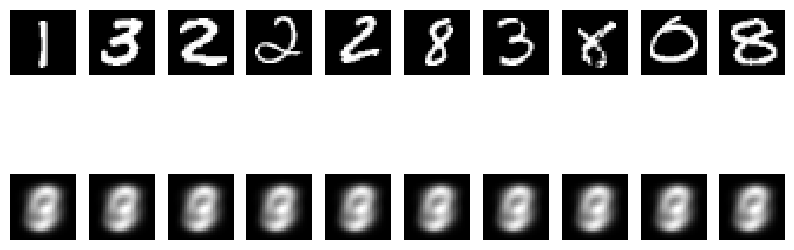

In [6]:
if __name__ == '__main__':

    experimental_tasks3 = []
    settings = [(5, 0.0001), (10, 0.0001), (15, 0.0001)]
    #train_data, test_data, m = get_mnist_data()

    for (num_epochs, l2_reg) in settings:

        model = AUTOENCODER()

        init = tf.global_variables_initializer()

        #Train
        train_loss, test_loss = [], []
        batch_size = 5000
        with tf.Session()   as sess:
            init.run()
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
            for epoch in range(num_epochs):
                print("Epoch:", epoch, "/", num_epochs)
                n_batches = m//batch_size
                for batch in range(n_batches):
                    X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                    sess.run(model.training_op, feed_dict={model.X: X_batch})
                train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
                test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

            reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

        experimental_tasks3.append(((num_epochs, l2_reg), train_loss, test_loss))

        plot_reconstructions(test_data[0: 10], reconstructions)

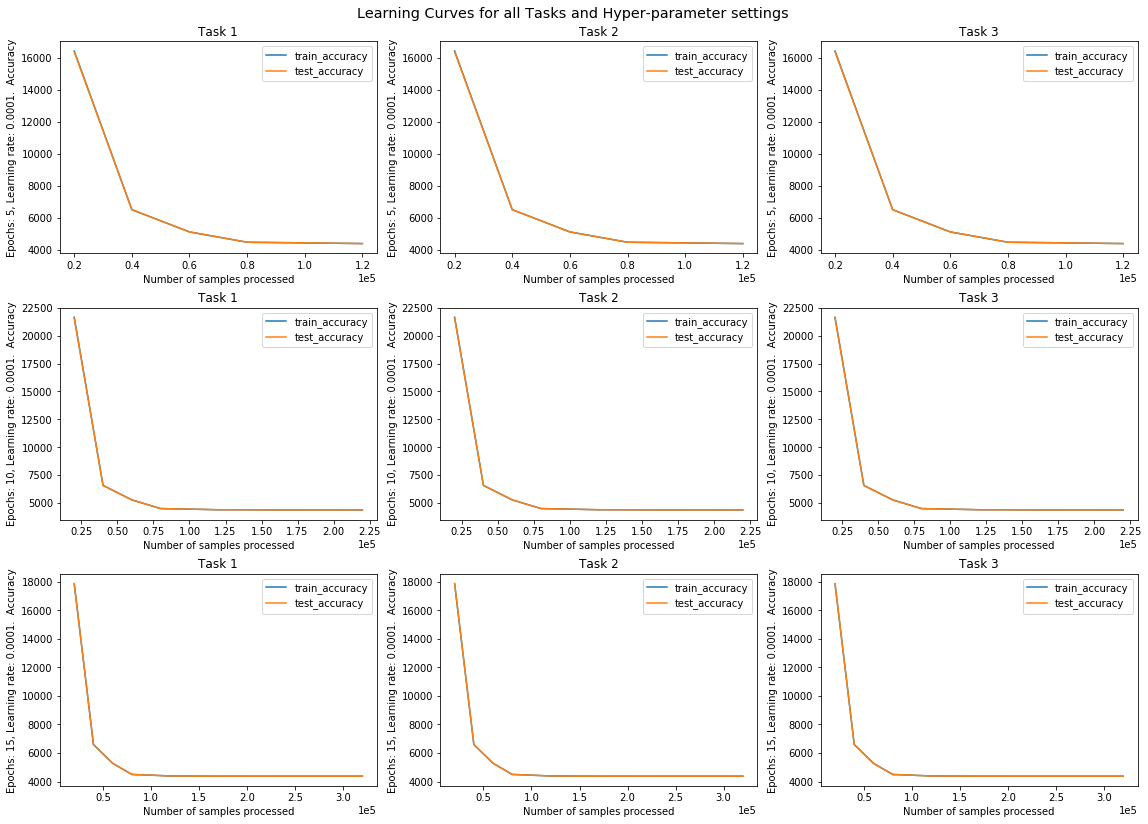

In [9]:
plot_learning_curves([experimental_tasks3, experimental_tasks3, experimental_tasks3])
#print(experimental_tasks2)